**Advanced Task : Final Project – Sales Data Analysis**

**Import Libraries**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Sales Data.csv")

# Drop empty columns
df = df.drop(columns=["Status", "unnamed1"], errors="ignore")

# Handle missing values
df = df.dropna(subset=["Amount"])  

# Preview dataset
print(df.head())
print(df.info())

   User_ID Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1000148    Rutuja  P00334642      F     51-55   51               0   
1  1004980       Rob  P00331942      F     26-35   31               0   
2  1001952       Rob  P00102342      F     36-45   36               0   
3  1004042  Phillina  P00114842      F     36-45   45               0   
4  1003317    Kinney  P00042242      F     26-35   30               0   

            State      Zone       Occupation Product_Category  Orders   Amount  
0       Telangana  Southern     Construction             Food       2  19643.0  
1  Madhya Pradesh   Central  Food Processing             Food       1  19642.0  
2         Haryana  Northern        IT Sector             Food       2  19641.0  
3       Karnataka  Southern           Lawyer             Food       1  19639.0  
4         Gujarat   Western            Media             Food       2  19638.0  
<class 'pandas.core.frame.DataFrame'>
Index: 10772 entries, 0 to 10772
Data

C:\Users\srira\AppData\Local\Temp\ipykernel_12776\422955510.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="Set2")


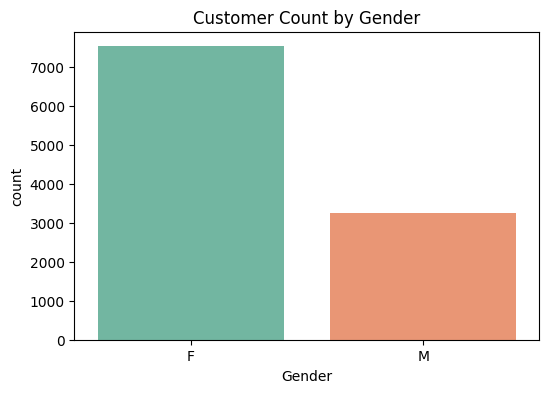

C:\Users\srira\AppData\Local\Temp\ipykernel_12776\422955510.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="Amount", data=df, estimator=sum, palette="Set2")


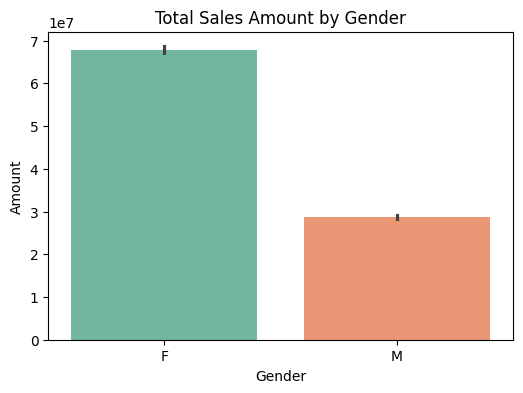

In [21]:

# --- Exploratory Data Analysis (EDA) ---

# 1. Sales Distribution by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df, palette="Set2")
plt.title("Customer Count by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x="Gender", y="Amount", data=df, estimator=sum, palette="Set2")
plt.title("Total Sales Amount by Gender")
plt.show()



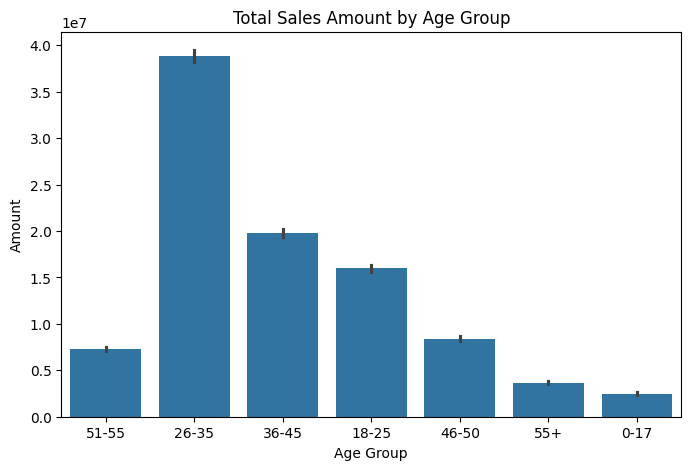

C:\Users\srira\AppData\Local\Temp\ipykernel_12776\2035766575.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")


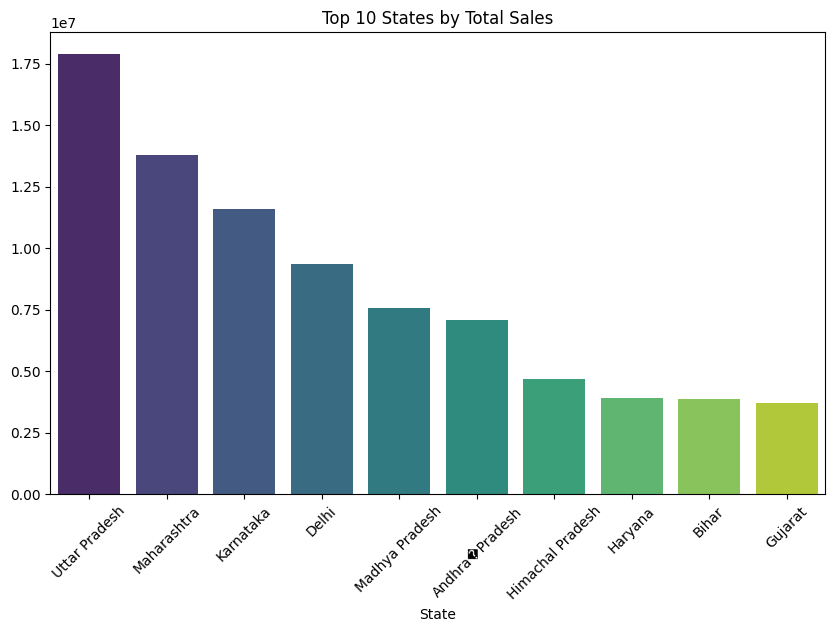

In [22]:
 #2. Sales by Age Group
plt.figure(figsize=(8,5))
sns.barplot(x="Age Group", y="Amount", data=df, estimator=sum, order=df["Age Group"].unique())
plt.title("Total Sales Amount by Age Group")
plt.show()

# 3. Sales by State
top_states = df.groupby("State")["Amount"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 States by Total Sales")
plt.show()


C:\Users\srira\AppData\Local\Temp\ipykernel_12776\3058771721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Occupation", y="Amount", data=df, estimator=sum, palette="coolwarm")


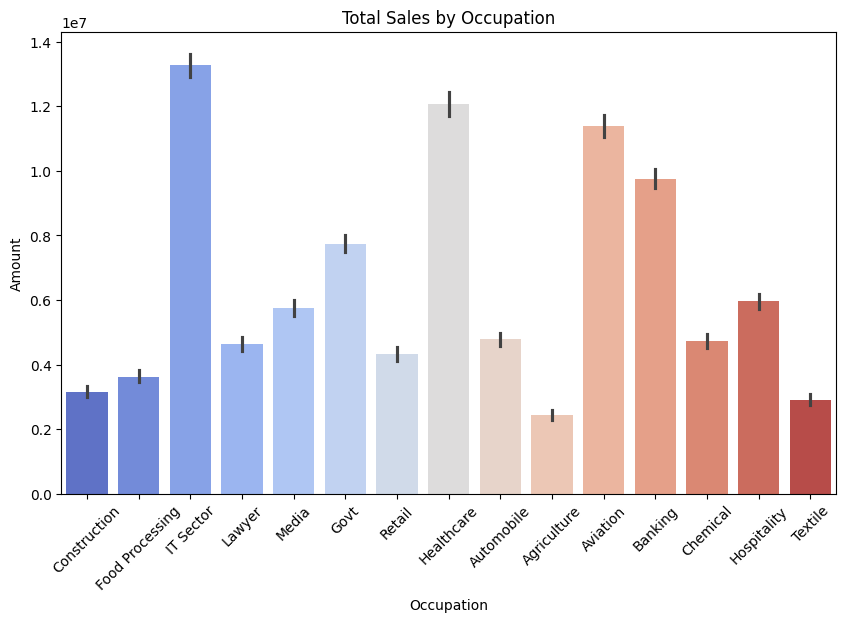

C:\Users\srira\AppData\Local\Temp\ipykernel_12776\3058771721.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product_Category", y="Amount", data=df, estimator=sum, palette="muted")


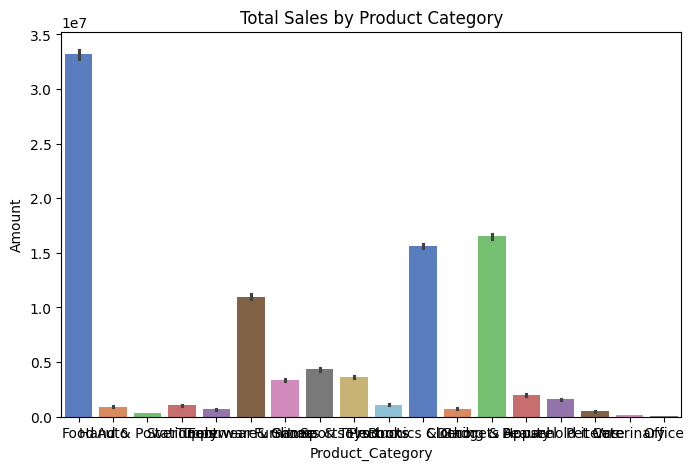

In [23]:
# 4. Sales by Occupation
plt.figure(figsize=(10,6))
sns.barplot(x="Occupation", y="Amount", data=df, estimator=sum, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Total Sales by Occupation")
plt.show()

# 5. Sales by Product Category
plt.figure(figsize=(8,5))
sns.barplot(x="Product_Category", y="Amount", data=df, estimator=sum, palette="muted")
plt.title("Total Sales by Product Category")
plt.show()


**Which Age Group & Gender contributes the most to sales**

Gender              F           M
Age Group                        
0-17        1361626.0   1130856.0
18-25      11006784.0   4979133.0
26-35      28226294.5  10660336.0
36-45      14037587.0   5796229.0
46-50       6101591.0   2319521.0
51-55       4804244.0   2458591.0
55+         2263703.0   1404644.0


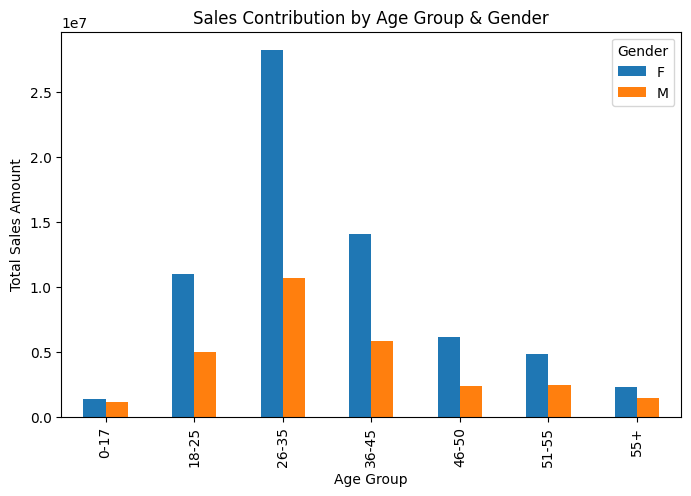

In [24]:
pivot = df.pivot_table(values="Amount", index="Age Group", columns="Gender", aggfunc="sum")
print(pivot)

pivot.plot(kind="bar", figsize=(8,5))
plt.title("Sales Contribution by Age Group & Gender")
plt.ylabel("Total Sales Amount")
plt.show()